## Homework 1 - Data Exploration using Census Data

In this homework assignment you will use census data from the 1994 and 1995 current population surveys conducted by the U.S. Census Bureau. A copy of this dataset is located at UCI Machine Learning repository, please see this [link](https://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29) to reach to the dataset website.

This dataset contains census data extracted from the 1994 and 1995 Current Population Surveys. We will only work with 'training' data (a link to that is provided to you below). The data contains 41 demographic and employment related variables. The abbreviated column names provided to you below. You are expected to read the documentation of this dataset, understand the features and preprocess this dataset. Additional information can be found [in the data description](https://archive.ics.uci.edu/ml/machine-learning-databases/census-income-mld/census-income.data.html) and [additional comments](https://archive.ics.uci.edu/ml/machine-learning-databases/census-income-mld/census-income.names).

Below you will find a code snippet to download and read the data into a pandas dataframe. You can alternatively download it yourself, extract and read it manually. The questions are shown in the subsequent cells. You can provide your answers in this file. Make sure to change the notebook's name and add your name before submitting.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import urllib.request
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/census-income-mld/census-income.data.gz'
census_dl_file = './census-income.data.gz'
urllib.request.urlretrieve(url, census_dl_file)

('./census-income.data.gz', <http.client.HTTPMessage at 0x7f9c00c74f40>)

In [3]:
columns_abbr = ['AAGE', 'ACLSWKR', 'ADTIND', 'ADTOCC', 'AHGA', 'AHRSPAY', 'AHSCOL', 'AMARITL', 'AMJIND', 'AMJOCC',
                'ARACE', 'AREORGN', 'ASEX', 'AUNMEM', 'AUNTYPE', 'AWKSTAT', 'CAPGAIN', 'CAPLOSS', 'DIVVAL', 
                'FILESTAT', 'GRINREG', 'GRINST', 'HHDFMX', 'HHDREL', 'MARSUPWT', 'MIGMTR1', 'MIGMTR3', 'MIGMTR4', 
                'MIGSAME', 'MIGSUN', 'NOEMP', 'PARENT', 'PEFNTVTY', 'PEMNTVTY', 'PENATVTY', 'PRCITSHP', 'SEOTR', 
                'VETQVA', 'VETYN', 'WKSWORK', 'YEAR', 'PTOTVALB']

In [4]:
df = pd.read_csv('census-income.data.gz', compression='gzip', names=columns_abbr, sep=r',', skipinitialspace=True)
df.head()

,AAGE,ACLSWKR,ADTIND,ADTOCC,AHGA,AHRSPAY,AHSCOL,AMARITL,AMJIND,AMJOCC,...,PEFNTVTY,PEMNTVTY,PENATVTY,PRCITSHP,SEOTR,VETQVA,VETYN,WKSWORK,YEAR,PTOTVALB
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.


In [5]:
## Handling the Invalid Values
df=df.replace("Not in universe",np.nan)
df=df.replace("?",np.nan)
df["AMJIND"]=df["AMJIND"].replace("Not in universe or children",np.nan)
df["MIGSAME"]=df["MIGSAME"].replace("Not in universe under 1 year old",np.nan)

Note: In the step above, all the invalid values in the census data is removed. Two invalid values("Not in universe" & "?" ) are present in the data.  All these values are replaced by Null values.

In [6]:
#you can see the DataFrame's info panel here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   AAGE      199523 non-null  int64  
 1   ACLSWKR   99278 non-null   object 
 2   ADTIND    199523 non-null  int64  
 3   ADTOCC    199523 non-null  int64  
 4   AHGA      199523 non-null  object 
 5   AHRSPAY   199523 non-null  int64  
 6   AHSCOL    12580 non-null   object 
 7   AMARITL   199523 non-null  object 
 8   AMJIND    98839 non-null   object 
 9   AMJOCC    98839 non-null   object 
 10  ARACE     199523 non-null  object 
 11  AREORGN   198649 non-null  object 
 12  ASEX      199523 non-null  object 
 13  AUNMEM    19064 non-null   object 
 14  AUNTYPE   6070 non-null    object 
 15  AWKSTAT   199523 non-null  object 
 16  CAPGAIN   199523 non-null  int64  
 17  CAPLOSS   199523 non-null  int64  
 18  DIVVAL    199523 non-null  int64  
 19  FILESTAT  199523 non-null  object 
 20  GRIN

### Q1 - Identify the data scales and data types for each variable in census data. Identify the domain for each variable by checking the attributes' values. Then, create a data quality report for both categorical (nominal, ordinal) and continuous (interval, ratio) variables. [40 pts]

For data scales, identify whether an attribute is nominal, ordinal, interval or ratio scale.
For data types, identify the domain and provide an appropriate data type (integer, float, String, date, Boolean). See if that data type is correct in your dataframe.
For domain, inspect each distinct value for each attribute. Identify missing values. Also include the bar plots and histograms for visualizing the distributions. 

The examples for a continious and a categorical feature can be seen below. You do not need to use jupyter formatting provided here. You can print a DataFrame or read a csv, and display it. Make sure you have the csv in your zip file.

In [7]:
# your code goes here
## Loading the CSV wfile which has data description stored as shown below:

variable_df=pd.read_csv(r"/Users/akhilarya/Desktop/FDS_assign1_data/desc.csv")
variable_df


,Column_name,Data_Description,Data_class,Data_Scale,Data_Type,Domain
0,AAGE,age,continious,ratio,int,Non negative Integers
1,ACLSWKR,class of worker,categorical,nominal,string,Set of 8 string values
2,ADTIND,industry code,categorical,nominal,int,"All Integers b/w [0,52]"
3,ADTOCC,occupation code,categorical,nominal,int,"All Integers b/w [0,46]"
4,AHGA,education,categorical,ordinal,string,Set of 17 string values
5,AHRSPAY,wage per hour,continious,ratio,int,Non negative integers
6,AHSCOL,enroll in edu inst last wk,categorical,ordinal,string,"[High school,College or university]"
7,AMARITL,marital stat,categorical,nominal,string,Set of 7 string values
8,AMJIND,major industry code,categorical,nominal,string,Set of 23 string values
9,AMJOCC,major occupation code,categorical,nominal,string,Set of 14 string values


Note : Columns ["AHGA","AHSCOL","YEAR","PTOTVALB"] are considered as ordinal values. 
1. For "AHGA" we can rank the degrees based on thier levels. Some assumption made: Assosciate degree academic program has higher rank then Assosciate Vocational Program & Prof school degree has higher rank then Masters degree. All other degrees are ranked in general order in which they can be pursuade.
2. For "AHSCOL" - "College or university" ranked  higher than "High School".
3. For "YEAR"- 95 has higher rank than 94
4. For "PTOTVALB"- "5000+." has higher rank than "-5000."

In [8]:
## Extracting continous & categorical feature names from the above dataframe
continous_vars=variable_df[variable_df["Data_class"]=="continious"]["Column_name"]
categorical_vars=variable_df[variable_df["Data_class"]=="categorical"]["Column_name"]

In [9]:
## Statistical Summary for Continious variables
summary_df_cont=pd.DataFrame()
for names in continous_vars:
    temp_df=pd.DataFrame()
    temp_df["Feature"]= [names]
    temp_df["Desc."]=variable_df[variable_df["Column_name"]==names]["Data_Description"].to_list()
    temp_df["Count"]=[df[names].shape[0]]
    temp_df["% of Missing"]=[df[names].isnull().sum()]/temp_df["Count"]*100
    temp_df["Card."]= [df[names].nunique()]
    temp_df["Min"]=[df[names].min()]
    temp_df["Q1"]=[df[names].quantile(0.25)]
    temp_df["Median"]=[df[names].quantile(0.5)]
    temp_df["Q3"]=[df[names].quantile(0.75)]
    temp_df["Max"]=[df[names].max()]
    temp_df["Mean"]=[df[names].mean()]
    temp_df["Std.Dev"]=[df[names].std()]
    summary_df_cont=pd.concat([summary_df_cont,temp_df])
    
    
summary_df_cont

,Feature,Desc.,Count,% of Missing,Card.,Min,Q1,Median,Q3,Max,Mean,Std.Dev
0,AAGE,age,199523,0.0,91,0.00,15.000,33.00,50.00,90.0,34.494199,22.310895
0,AHRSPAY,wage per hour,199523,0.0,1240,0.00,0.000,0.00,0.00,9999.0,55.426908,274.896454
0,CAPGAIN,capital gains,199523,0.0,132,0.00,0.000,0.00,0.00,99999.0,434.718990,4697.531280
0,CAPLOSS,capital losses,199523,0.0,113,0.00,0.000,0.00,0.00,4608.0,37.313788,271.896428
0,DIVVAL,dividends from stocks,199523,0.0,1478,0.00,0.000,0.00,0.00,99999.0,197.529533,1984.163658
0,MARSUPWT,instance weight,199523,0.0,99800,37.87,1061.615,1618.31,2188.61,18656.3,1740.380269,993.768156
0,NOEMP,num persons worked for employer,199523,0.0,7,0.00,0.000,1.00,4.00,6.0,1.956180,2.365126
0,WKSWORK,weeks worked in year,199523,0.0,53,0.00,0.000,8.00,52.00,52.0,23.174897,24.411488


In [10]:
## Statistical Summary for categorical variables
summary_df_cat=pd.DataFrame()
for names in categorical_vars:
    temp_df=pd.DataFrame()
    temp_df["Feature"]= [names]
    temp_df["Desc."]=variable_df[variable_df["Column_name"]==names]["Data_Description"].to_list()
    temp_df["Count"]=[df[names].shape[0]]
    temp_df["% of Missing"]=([df[names].isnull().sum()]/temp_df["Count"])*100
    temp_df["Card."]= [df[names].nunique()]
    temp_df["Mode"]=[df[names].mode(dropna=True)[0]]
    temp_df["Mode Freq"]=[(df[names]==temp_df["Mode"][0]).sum()]
    temp_df["Mode %"]=temp_df["Mode Freq"]/temp_df["Count"]*100
    temp_df["2nd Mode"]=[df[df[names]!=temp_df["Mode"][0]][names].mode(dropna=True)[0]]
    temp_df["2nd Mode Freq"]=[(df[names]==temp_df["2nd Mode"][0]).sum()]
    temp_df["2nd Mode %"]=temp_df["2nd Mode Freq"]/temp_df["Count"]*100
    summary_df_cat=pd.concat([summary_df_cat,temp_df])
    
    
    
summary_df_cat

,Feature,Desc.,Count,% of Missing,Card.,Mode,Mode Freq,Mode %,2nd Mode,2nd Mode Freq,2nd Mode %
0,ACLSWKR,class of worker,199523,50.242328,8,Private,72028,36.100099,Self-employed-not incorporated,8445,4.232595
0,ADTIND,industry code,199523,0.000000,52,0,100684,50.462353,33,17070,8.555405
0,ADTOCC,occupation code,199523,0.000000,47,0,100684,50.462353,2,8756,4.388466
0,AHGA,education,199523,0.000000,17,High school graduate,48407,24.261363,Children,47422,23.767686
0,AHSCOL,enroll in edu inst last wk,199523,93.694962,2,High school,6892,3.454238,College or university,5688,2.850799
0,AMARITL,marital stat,199523,0.000000,7,Never married,86485,43.345880,Married-civilian spouse present,84222,42.211675
0,AMJIND,major industry code,199523,50.462353,23,Retail trade,17070,8.555405,Manufacturing-durable goods,9015,4.518276
0,AMJOCC,major occupation code,199523,50.462353,14,Adm support including clerical,14837,7.436235,Professional specialty,13940,6.986663
0,ARACE,race,199523,0.000000,5,White,167365,83.882560,Black,20415,10.231903
0,AREORGN,hispanic origin,199523,0.438045,9,All other,171907,86.158989,Mexican-American,8079,4.049157


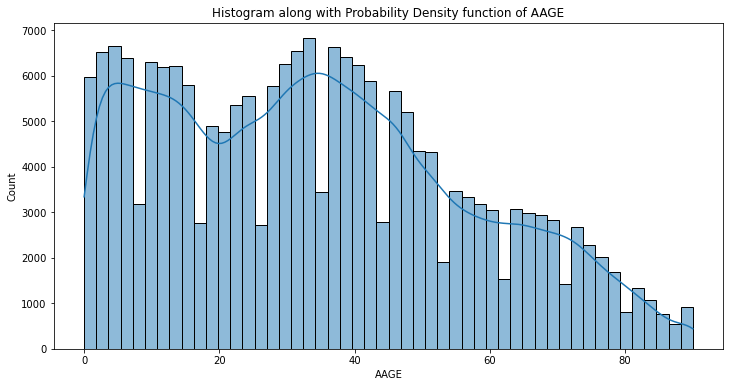

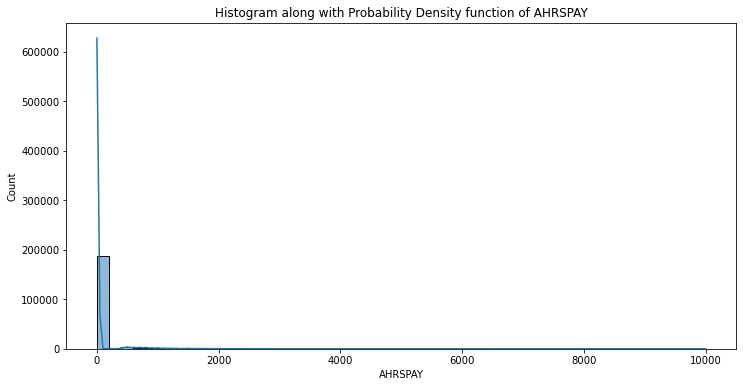

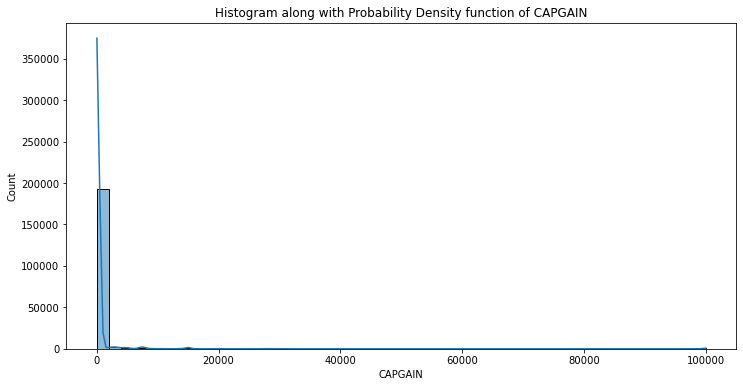

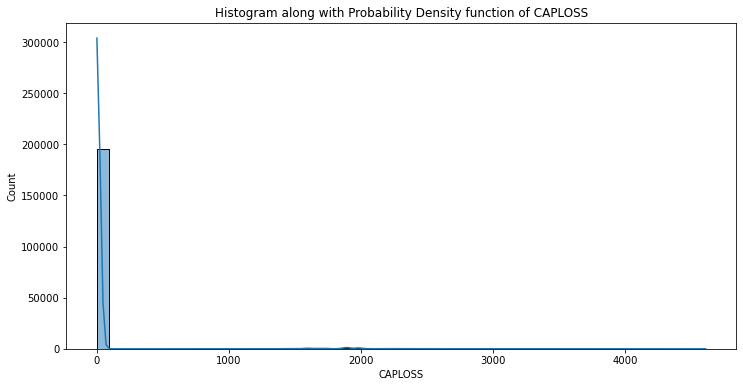

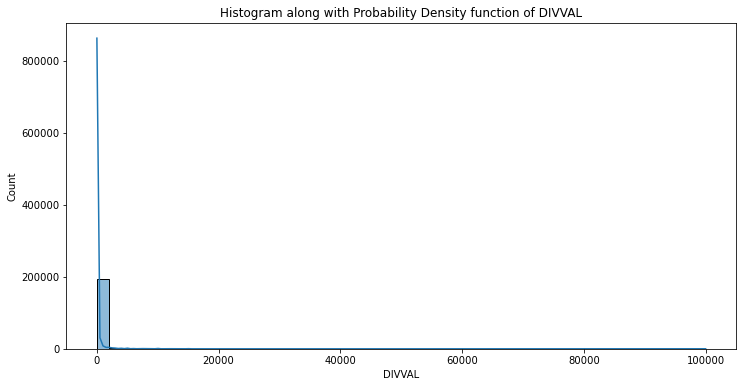

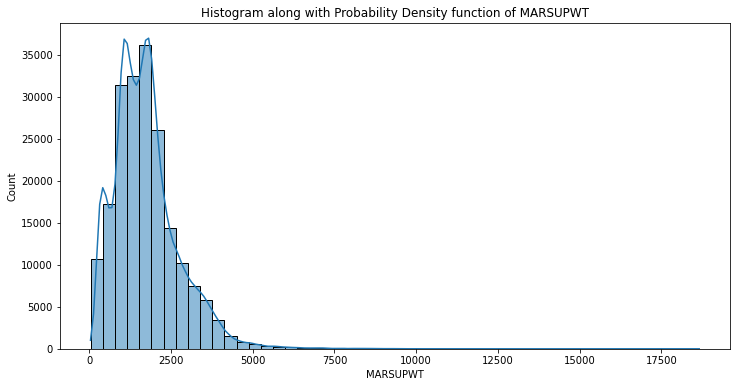

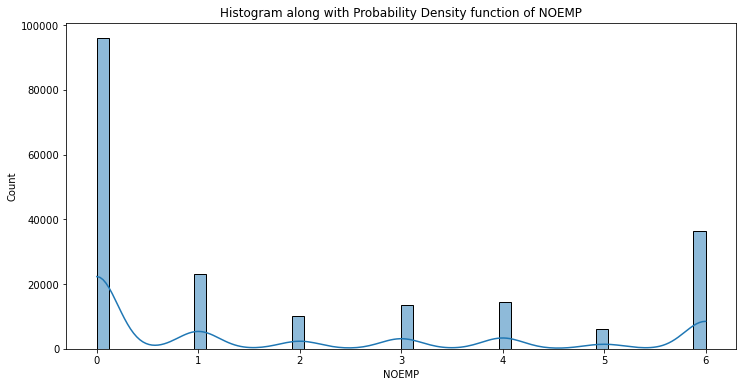

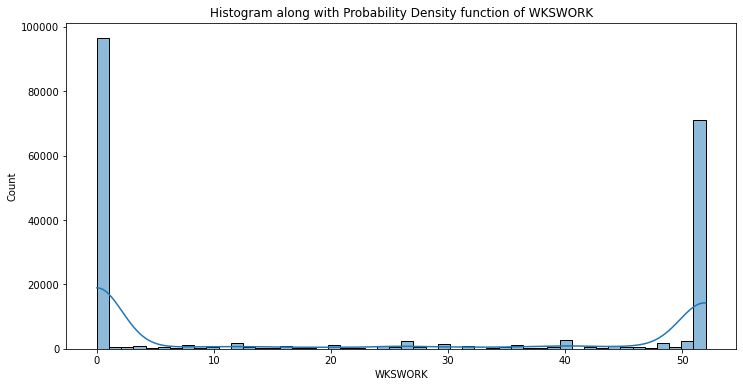

In [11]:
## Plots for Histogram and PDF for continious Variables 

for name in continous_vars:
    fig, ax = plt.subplots(1,1,figsize=(12,6))
    sns.histplot(data=df[continous_vars], x=name, 
                 kde=True,bins=50).set_title("Histogram along with Probability Density function of"+ " " + name)
    

<ipython-input-12-275388f55b68>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1,figsize=(20,4))


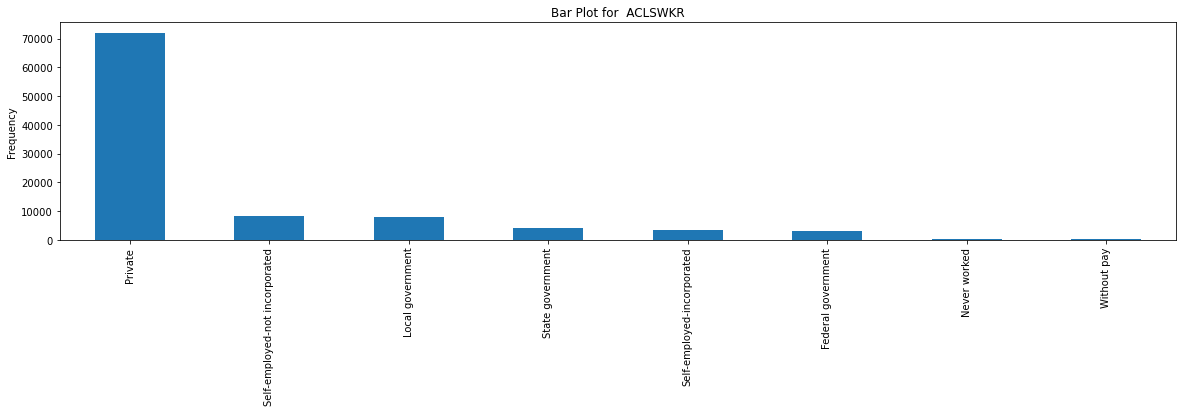

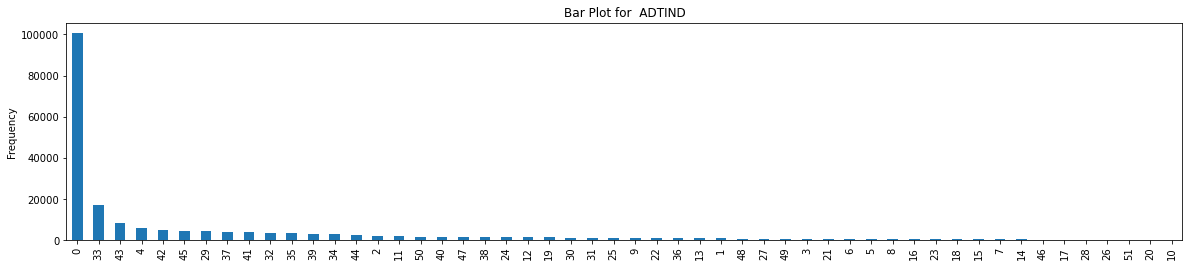

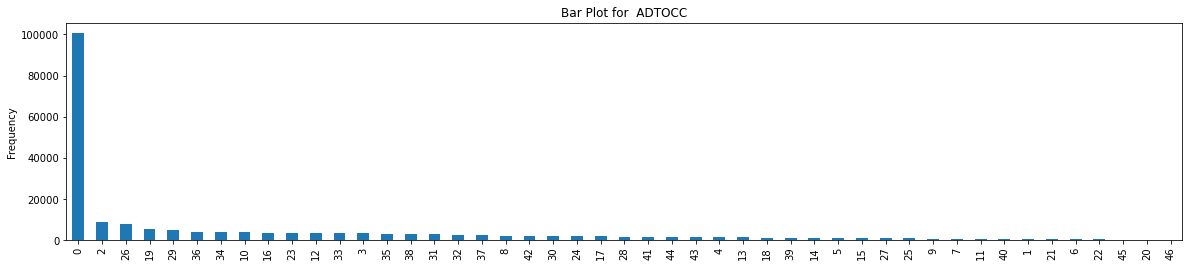

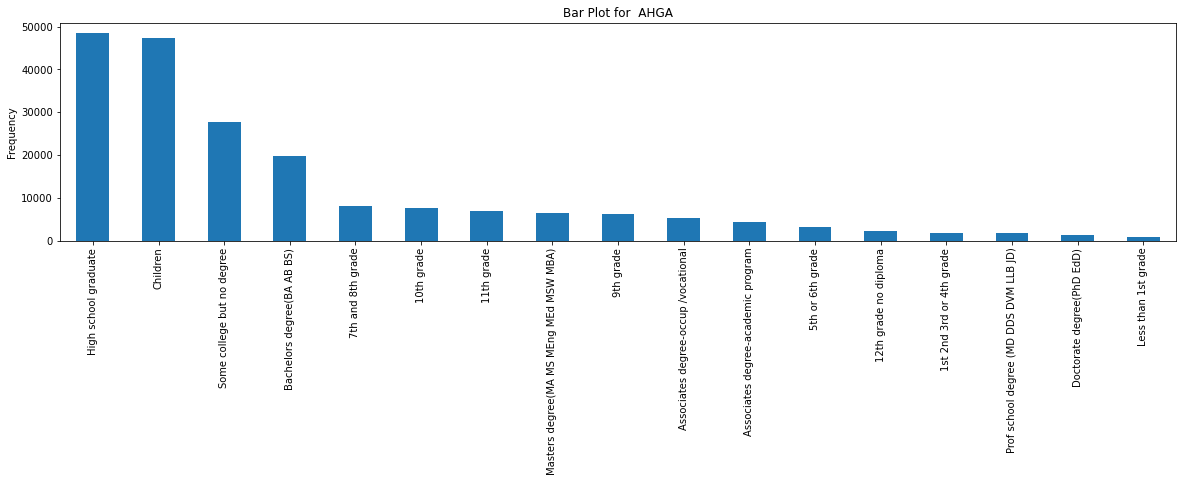

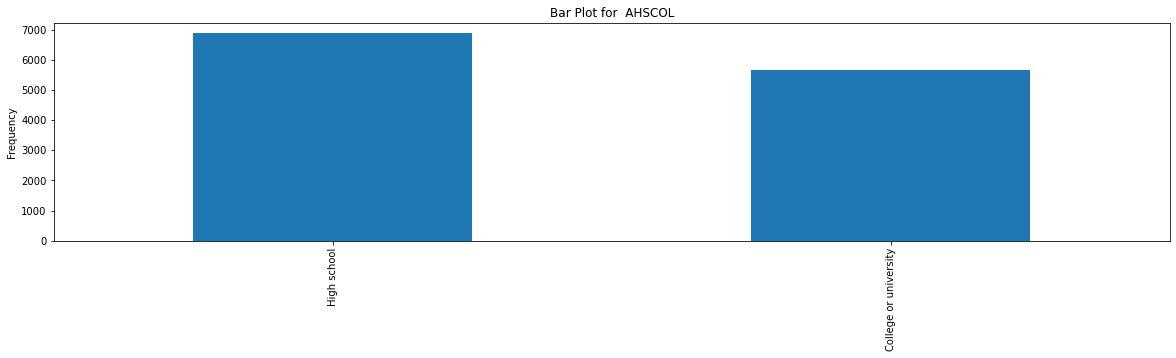

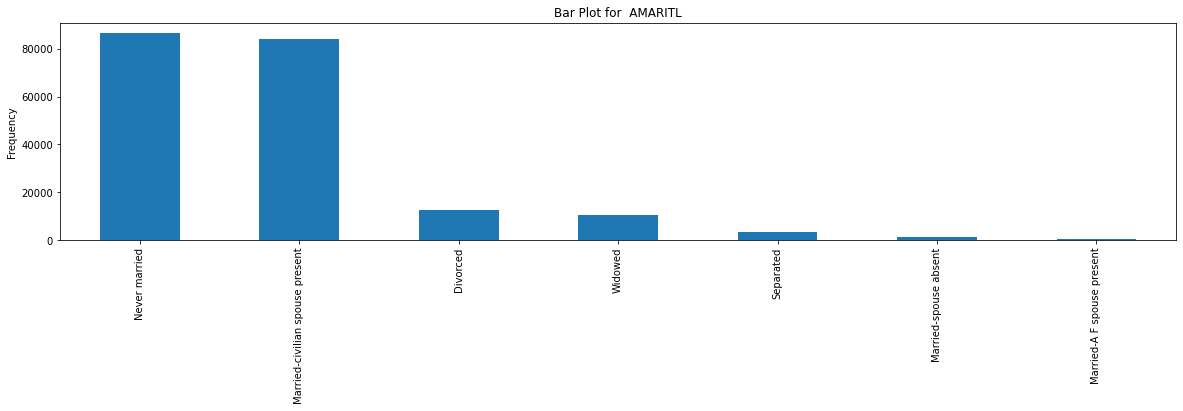

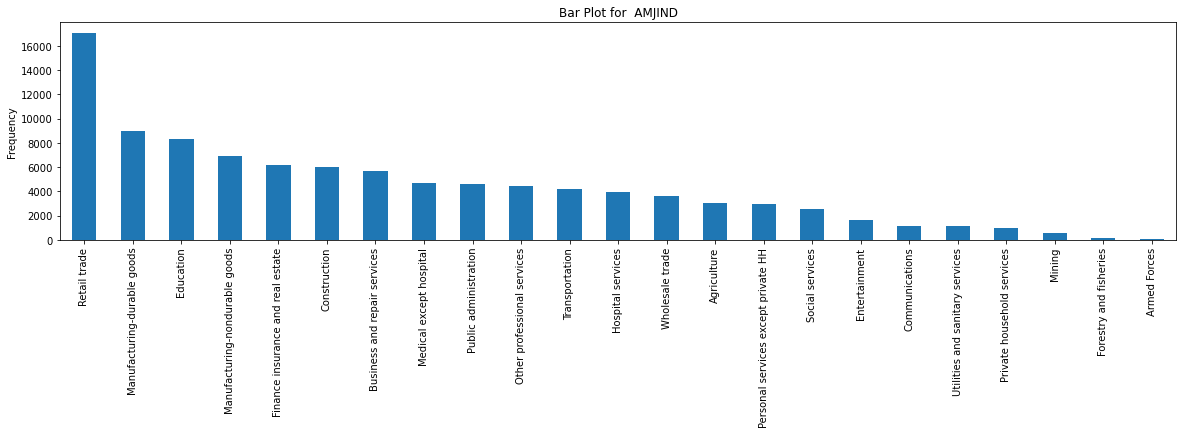

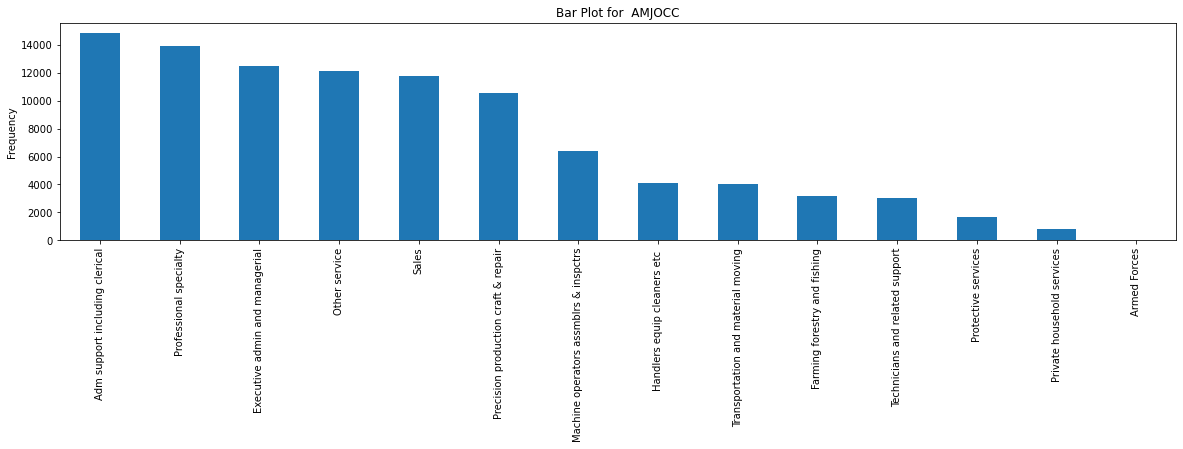

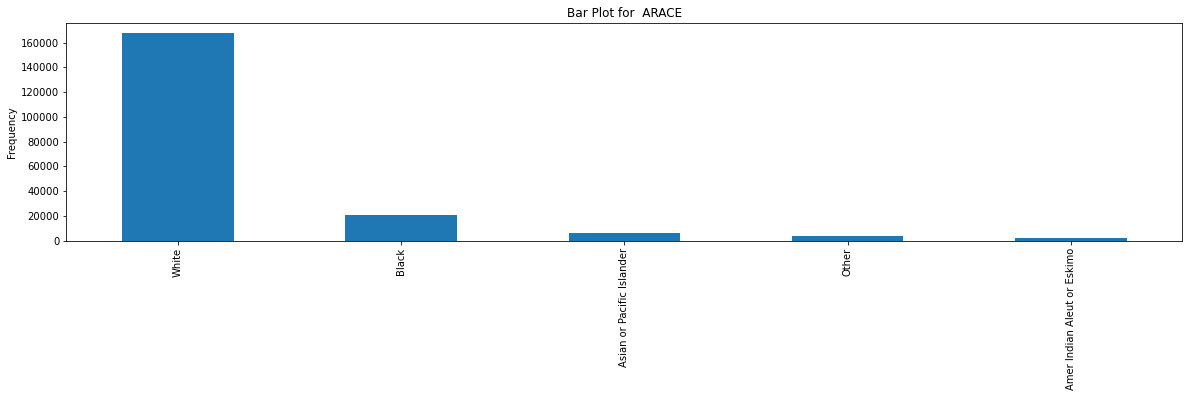

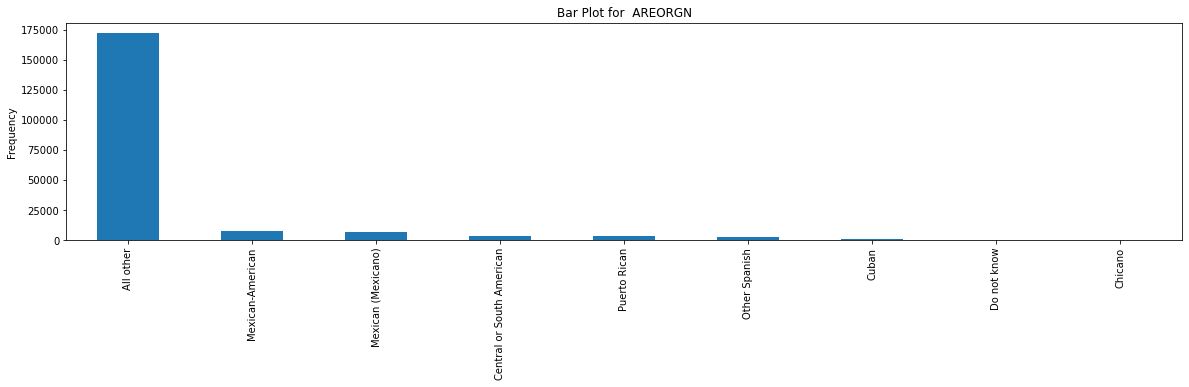

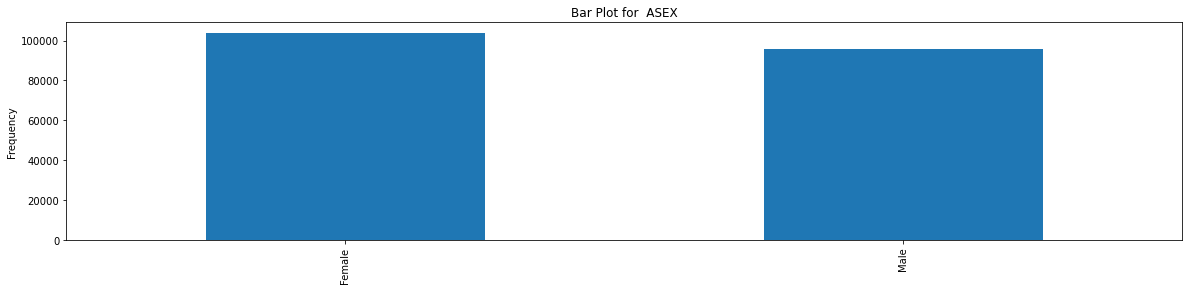

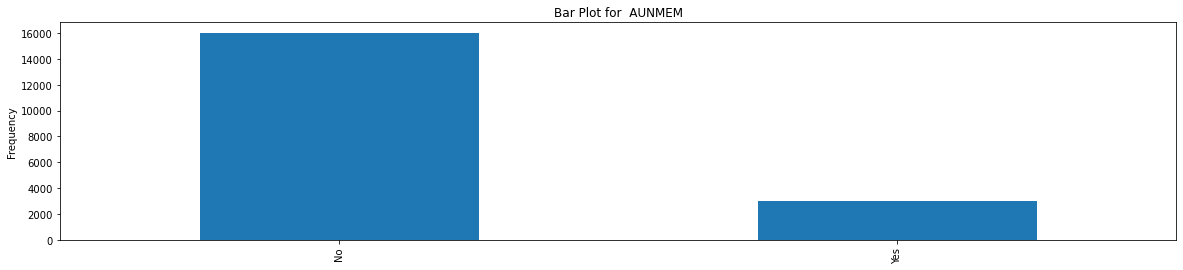

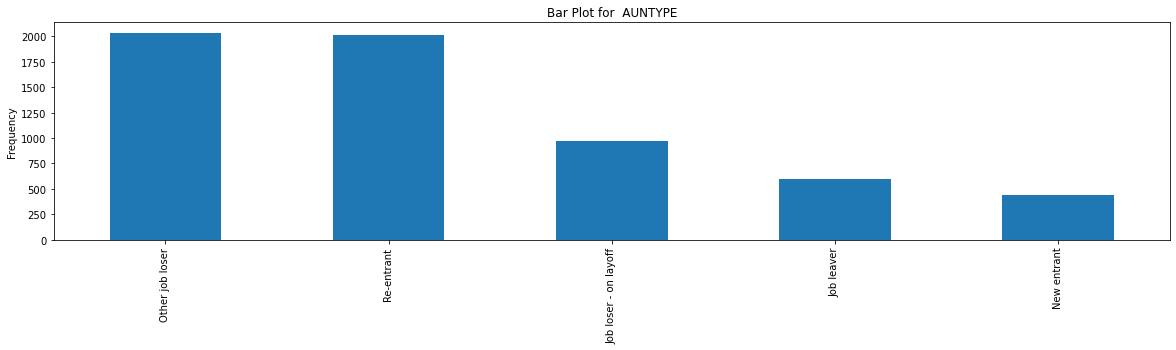

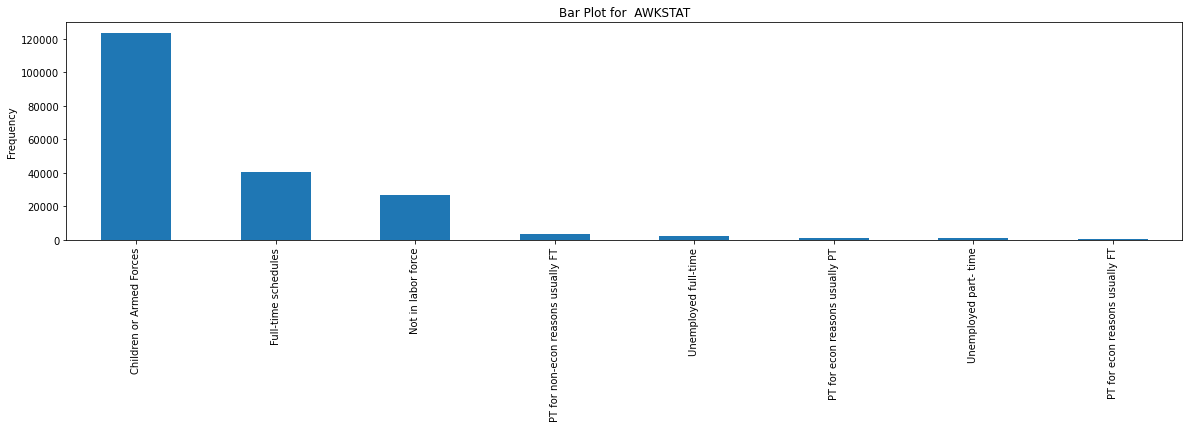

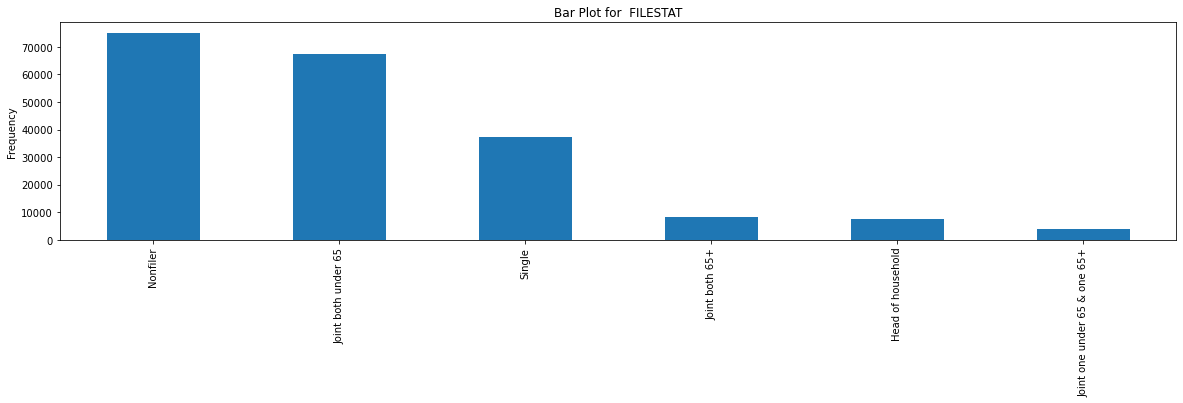

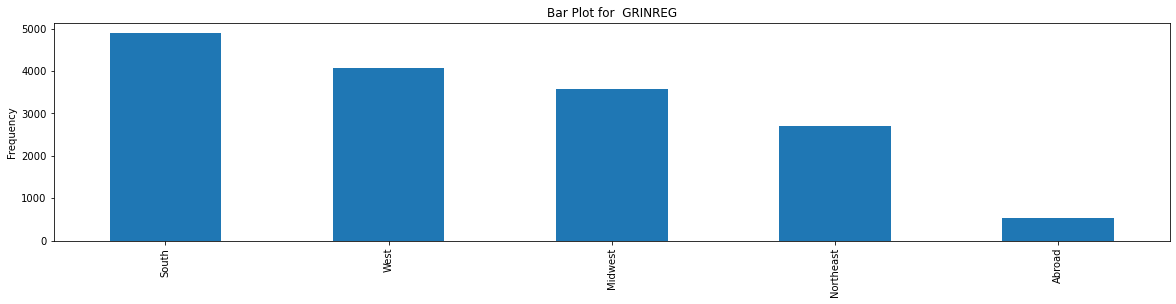

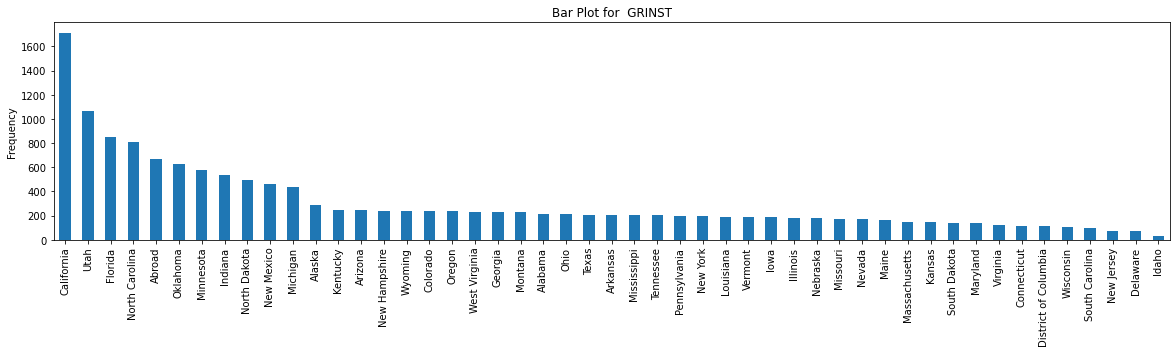

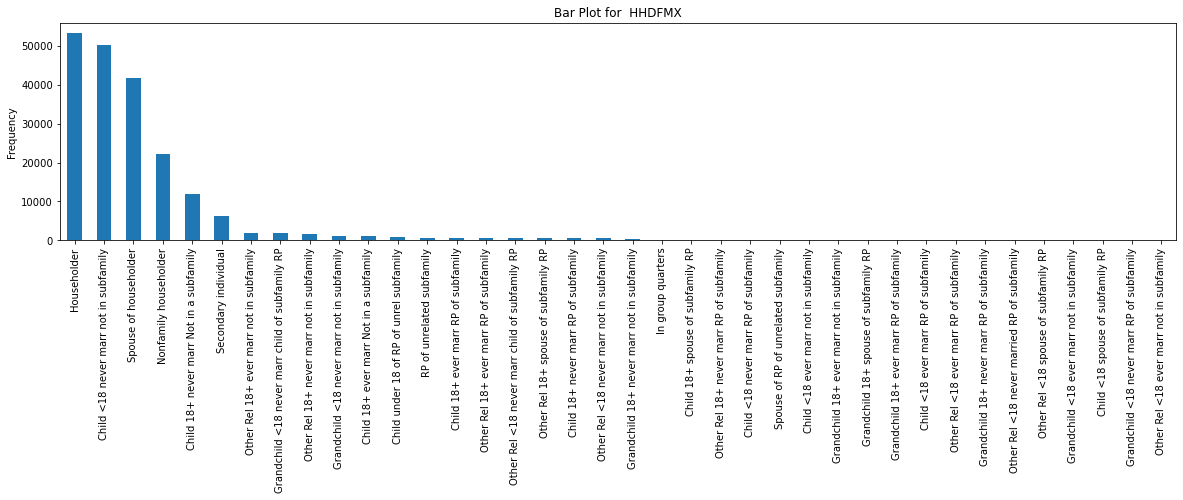

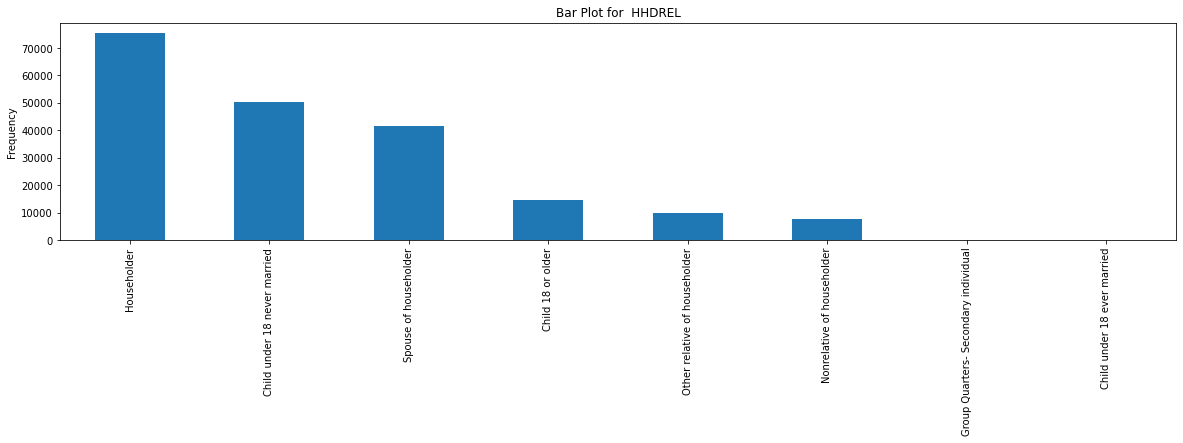

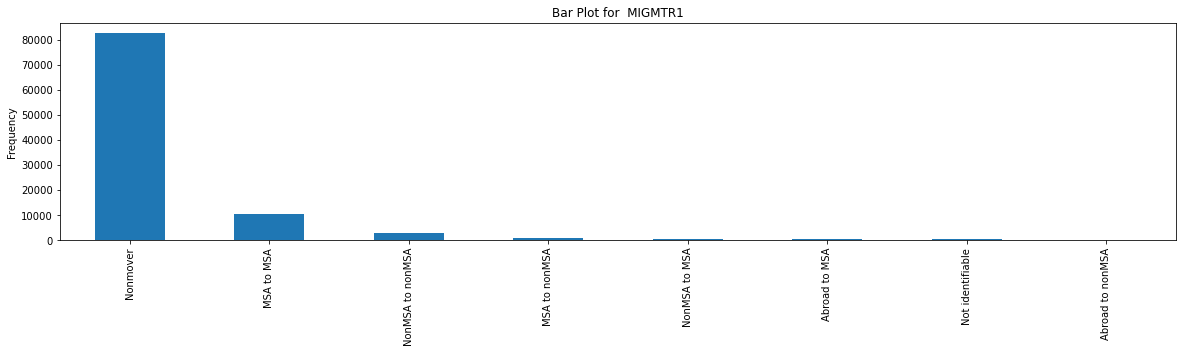

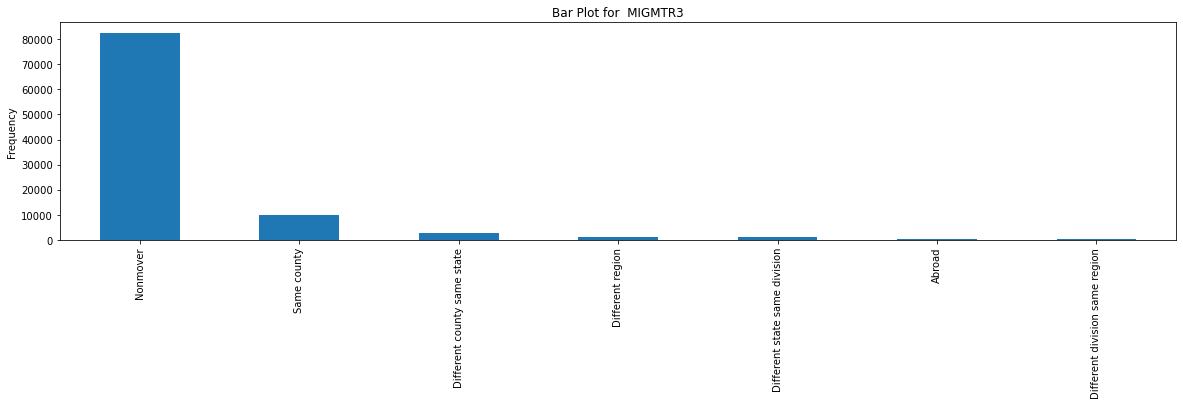

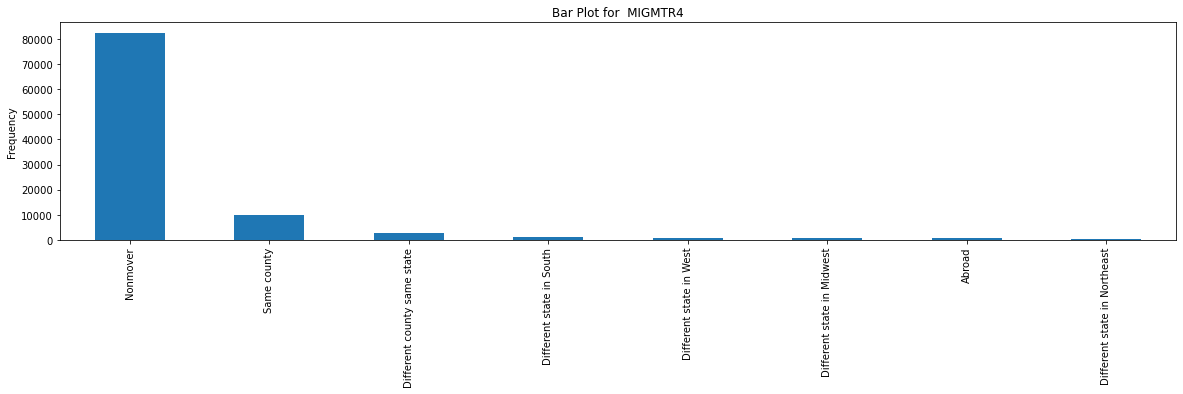

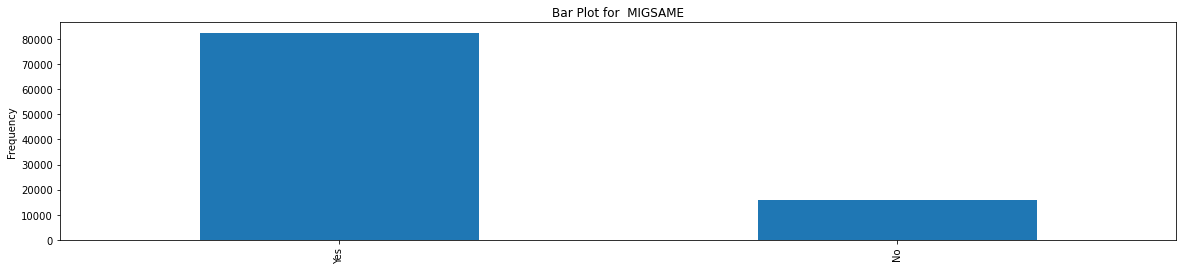

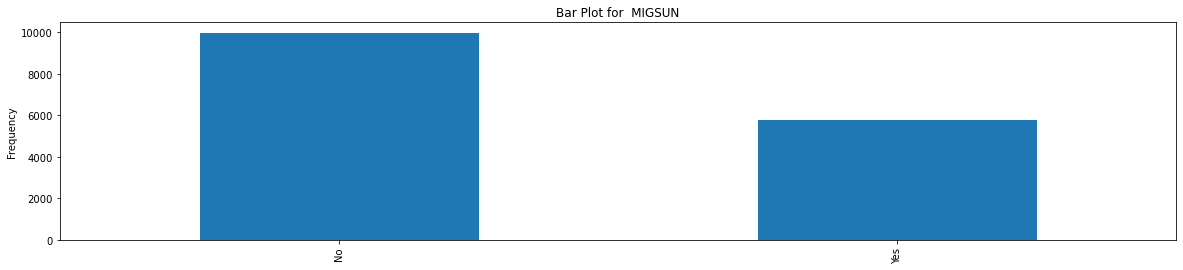

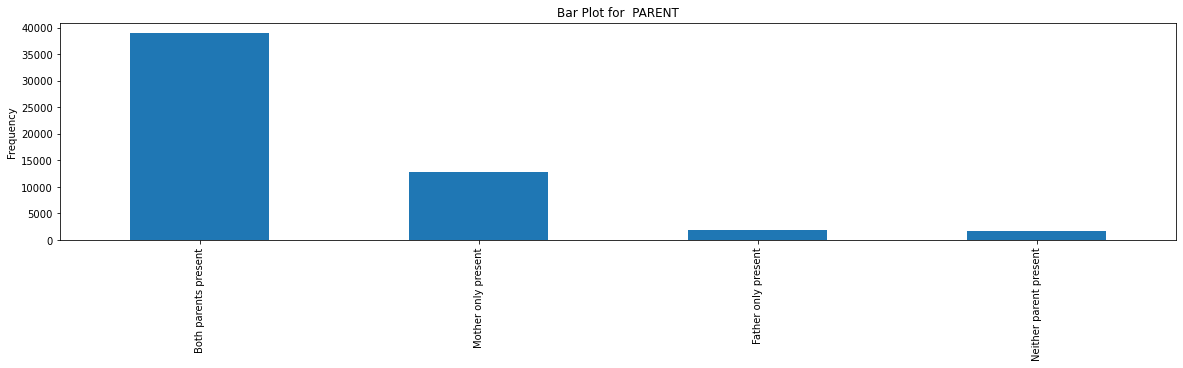

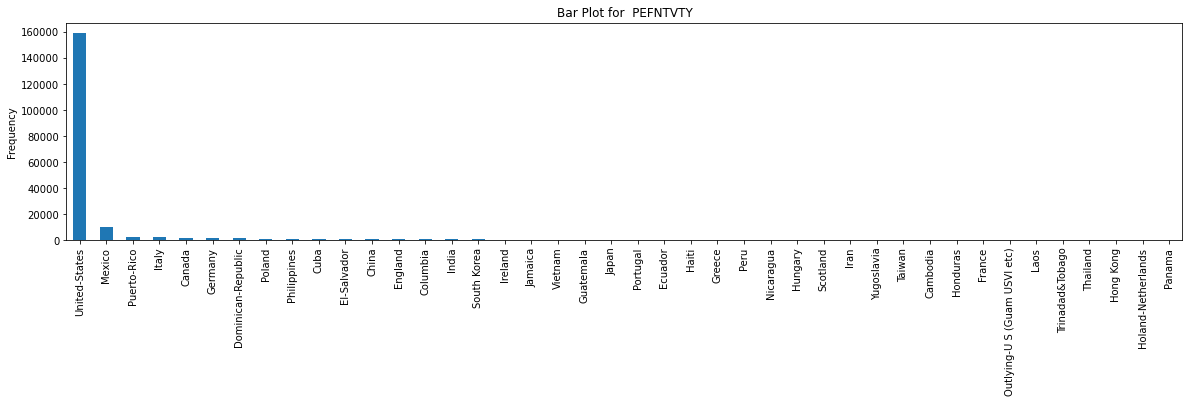

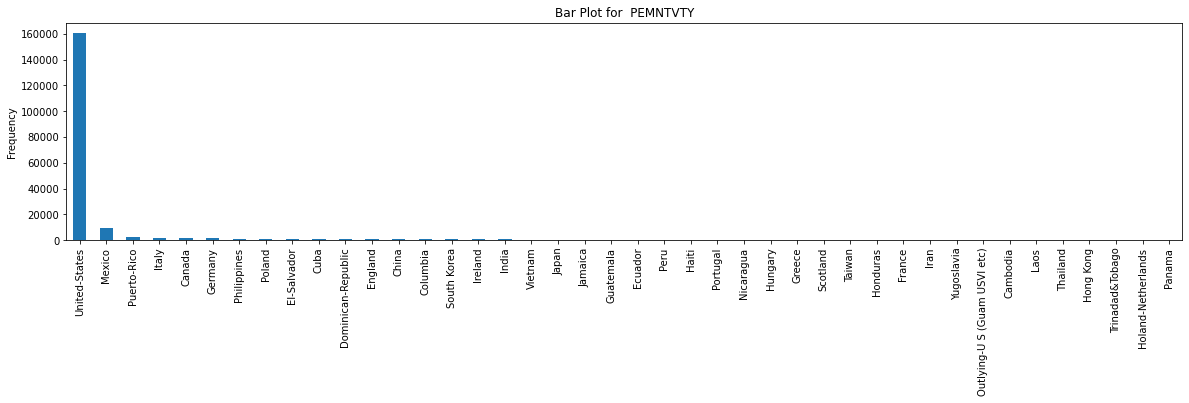

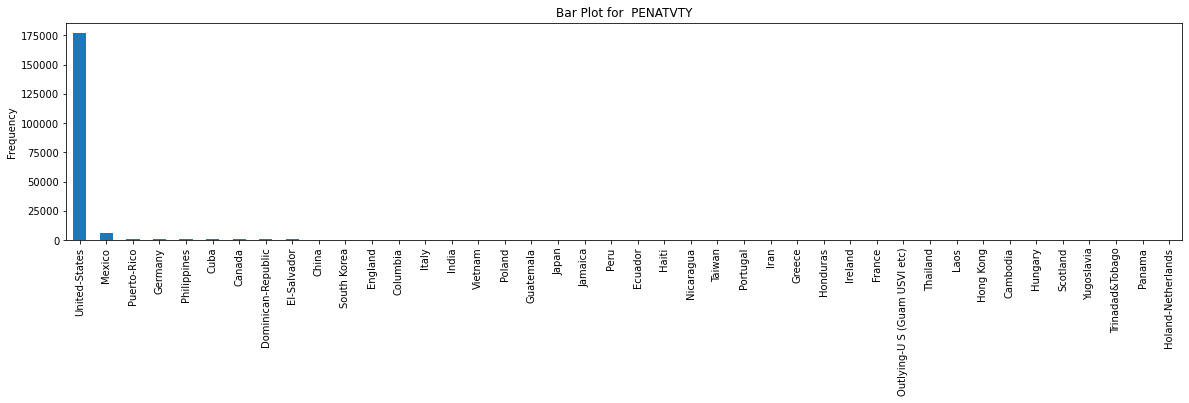

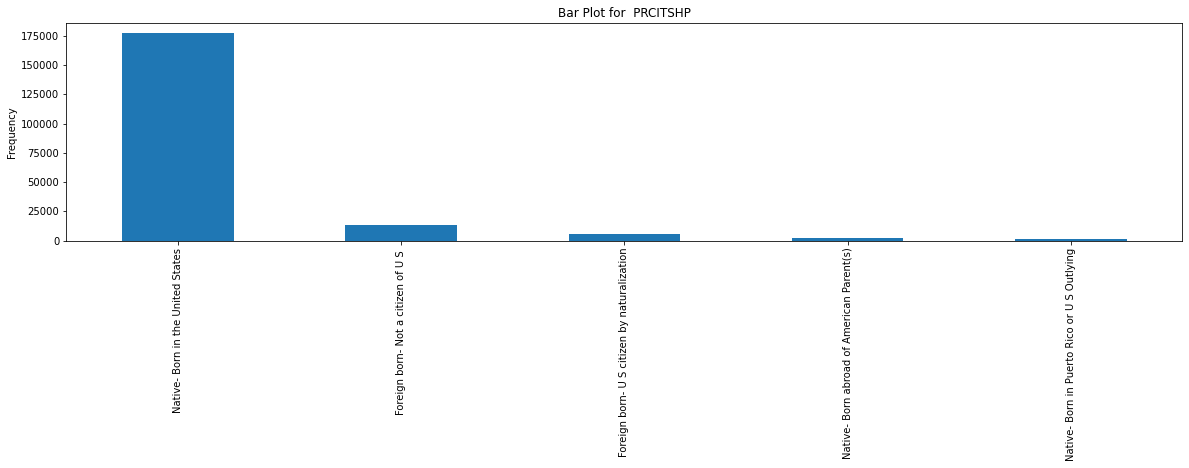

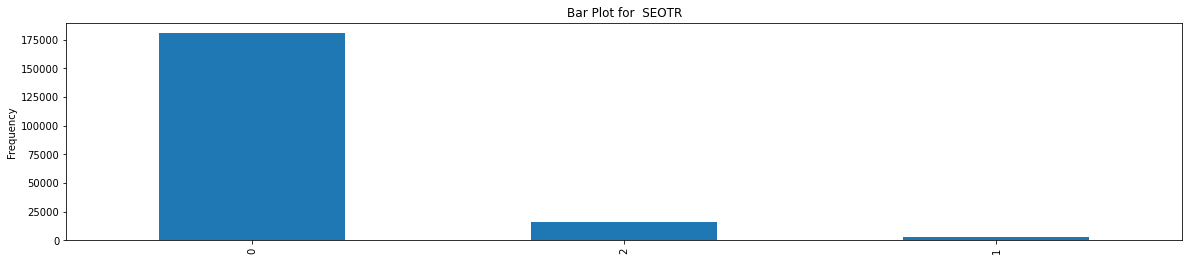

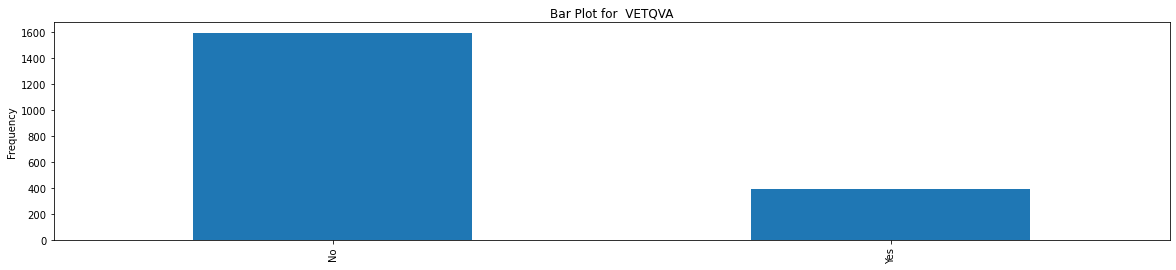

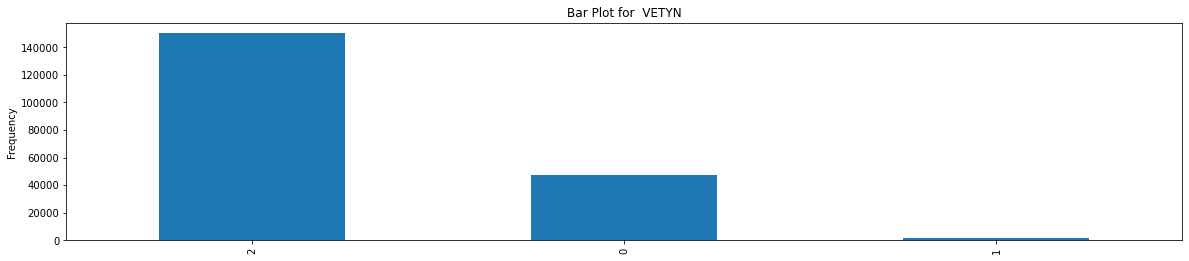

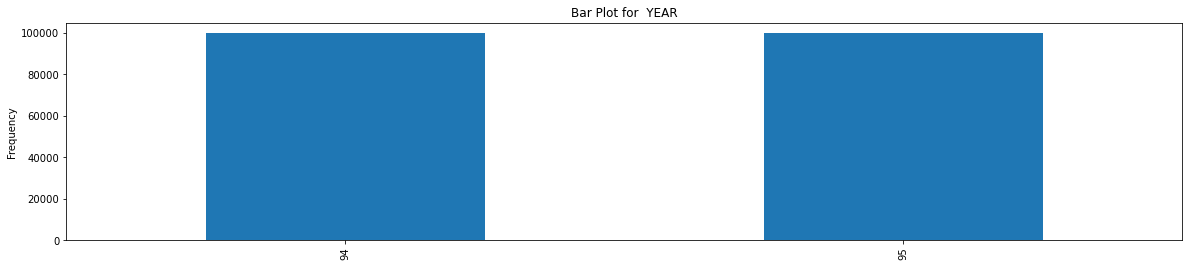

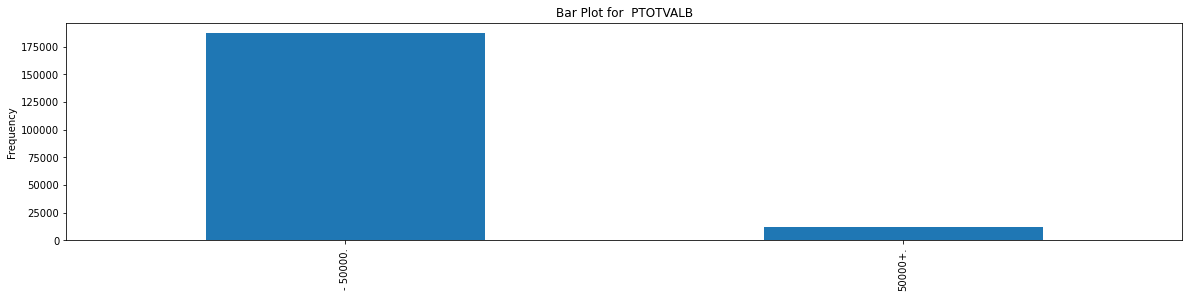

In [12]:
## BAR Plots for categorical  variables
for name in categorical_vars:
    fig, ax = plt.subplots(1,1,figsize=(20,4))
    df[name].value_counts().plot(kind='bar',ax=ax,title="Bar Plot for "+ " " + name,ylabel="Frequency")
                                 

### Data Quality Report for Cont Variables

| Feature | Desc. | Count | % of Missing | Card. | Min. | Q1 | Median | Q3 | Max. | Mean | Std. Dev. | Notes |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| AAGE | Age | 199,523 | 0 | 91 | 0 | 15 | 33 | 50 | 90 | 34.49 | 22.31 |  |

### Data Quality Report for Categorical Variables

| Feature | Desc. | Count | % of Missing | Card. | Mode | Mode Freq. | Mode % | 2nd Mode | 2nd Mode Freq. | 2nd Mode Perc | Notes |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| ACLSWKR | Class of worker | 199,523 | 0 | 9 | Not in Universe | 100,245 | 50.24 | Private | 72,028 |  36.10 |  |

### Q2 - Identify the data quality issues for each attribute. Create a data quality plan and implement the changes. [35 pts] 

Identify missing values, potential anomalies and outliers. Finally, remedy these issues.

In [13]:
# your code goes here

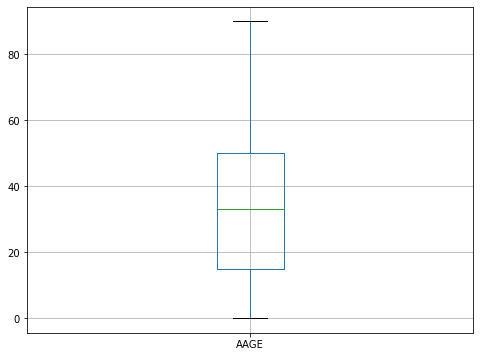

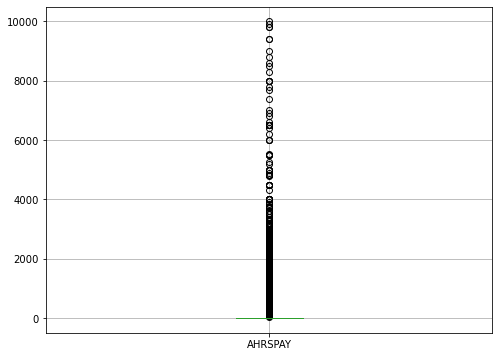

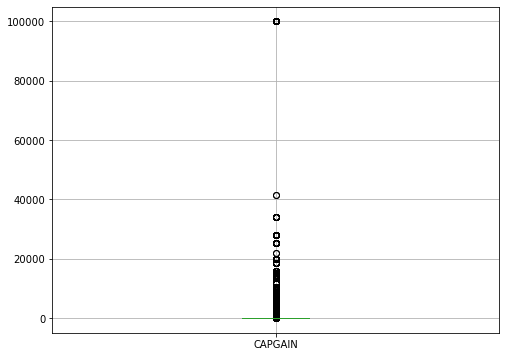

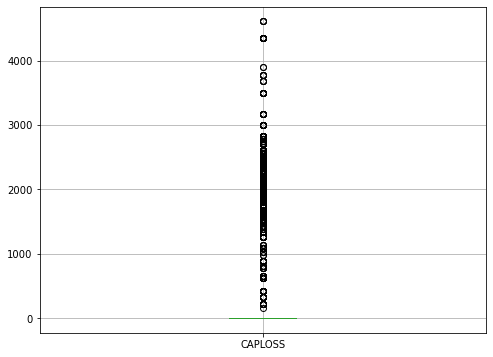

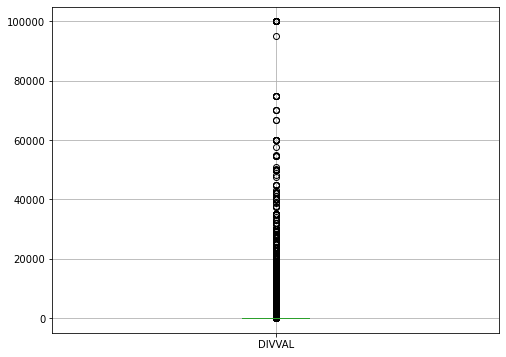

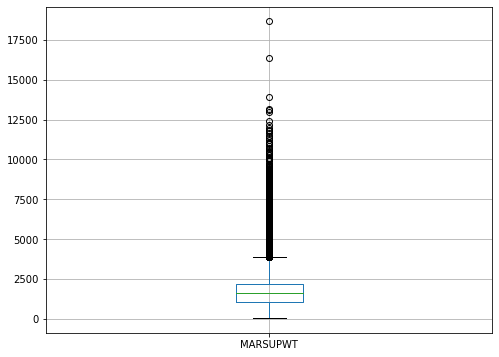

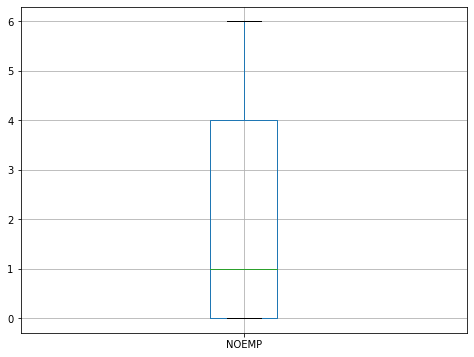

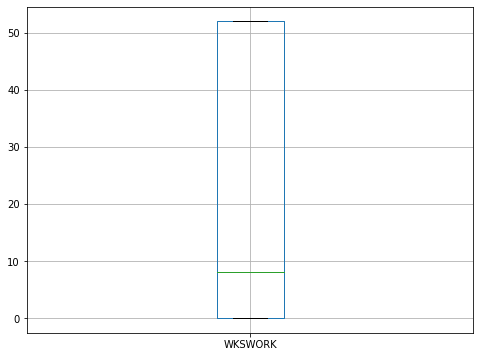

In [14]:
## Study of outliers presents in continious variables  through Box Plots
for name in continous_vars:
    fig, ax = plt.subplots(1,1,figsize=(8,6))
    df[continous_vars].boxplot(column=name,ax=ax)

We can observe that among all the continious variables , for 5 variables ("AHRSPAY", "CAPGAIN", "CAPLOSS","DIVVAL", "MARSUPWT") outliers are detected using box plots. Hence, we need to propose plan to handle the outliers for these variables.

In [15]:
## Loading Data Quality Plan from CSV file "Data_Quality_Plan.csv"
data_quality_plan=pd.read_csv(r"/Users/akhilarya/Desktop/FDS_assign1_data/Data_Quality_Plan.csv")

In [16]:
data_quality_plan

,Feature,Data Quality Isuue,Potential Handling
0,ACLSWKR,Missing Value,Drop the column. Missing value>50%
1,AHSCOL,Missing Value,Drop the column. High % of missing values
2,AMJIND,Missing Value,Drop the column. Missing value>50%
3,AMJOCC,Missing Value,Drop the column. Missing value>50%
4,AREORGN,Missing Value,Imputation with mode value. As mode Freq is high
5,AUNMEM,Missing Value,Drop the column. High % of missing values
6,AUNTYPE,Missing Value,Drop the column. High % of missing values
7,GRINREG,Missing Value,Drop the column. High % of missing values
8,GRINST,Missing Value,Drop the column. High % of missing values
9,MIGMTR1,Missing Value,Drop the column. Missing value>50%


Note: For Missing value Treatment; Any column which has more than 50% of missing values in the data, those columns 
    will be simply dropped from the data. Due to high % of miising values, imputing those columns is not a good idea. Also, dropping row wise will lead to 50% data loss. Hence, it's best to remove columns having high % of missing values.

In [17]:
## Extracting the colums list which has high % of missing values.

Column_drop= data_quality_plan[((data_quality_plan["Potential Handling"]=="Drop the column. Missing value>50%") |
                              (data_quality_plan["Potential Handling"]=="Drop the column. High % of missing values"))]
column_drop_ls=Column_drop["Feature "].to_list()
print("No of columns to be deleted", len(column_drop_ls))

No of columns to be deleted 15


For all other variables which has not high missing values %, we can use imputation method. Since, in this case all such columns are categorical feature and Mode Frequency of these columns are significantly high, we have imputed missing values with Mode of the distribution.

In [18]:
## Handling Missing values
df_final=df.drop(columns=column_drop_ls)  ## Dropping colums with high % of missing values
df_final["AREORGN"]=df_final["AREORGN"].fillna("All other")  ## Imputatation using the mode values
df_final["PEFNTVTY"]=df_final["PEFNTVTY"].fillna("United-States")
df_final["PEMNTVTY"]=df_final["PEMNTVTY"].fillna("United-States")
df_final["PENATVTY"]=df_final["PENATVTY"].fillna("United-States")


In [19]:
## Checking if there are any null values in the remaining data with filtered columns.
df_final.isnull().sum()

AAGE        0
ADTIND      0
ADTOCC      0
AHGA        0
AHRSPAY     0
AMARITL     0
ARACE       0
AREORGN     0
ASEX        0
AWKSTAT     0
CAPGAIN     0
CAPLOSS     0
DIVVAL      0
FILESTAT    0
HHDFMX      0
HHDREL      0
MARSUPWT    0
NOEMP       0
PEFNTVTY    0
PEMNTVTY    0
PENATVTY    0
PRCITSHP    0
SEOTR       0
VETYN       0
WKSWORK     0
YEAR        0
PTOTVALB    0
dtype: int64

In [20]:
##Handling Outlier using the clamping transformation within the two standard deviations from mean of the distribution.

df_final["AHRSPAY"]=df_final["AHRSPAY"].clip(0,605.2) ## Values are clipped within min & two SD from the mean of distribution.
df_final["CAPGAIN"]=df_final["CAPGAIN"].clip(0,9829.77)
df_final["CAPLOSS"]=df_final["CAPLOSS"].clip(0,580.78)
df_final["DIVVAL"]=df_final["DIVVAL"].clip(0,4165.84)
df_final["MARSUPWT"]=df_final["MARSUPWT"].clip(37.87,3727.9)


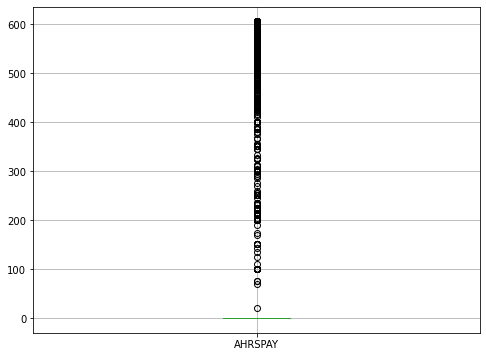

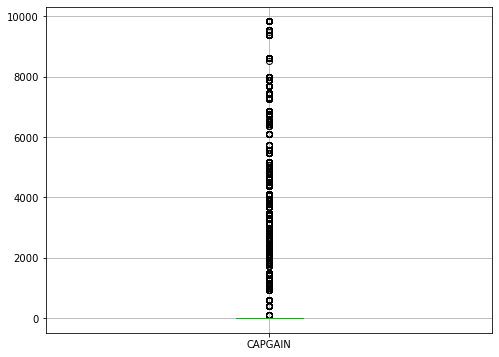

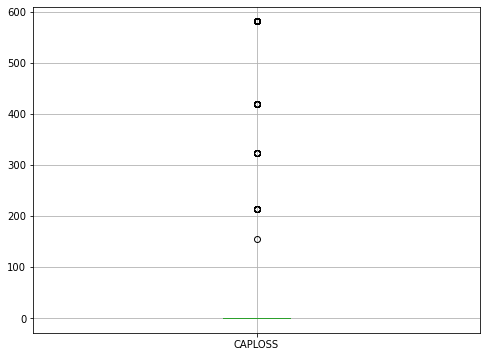

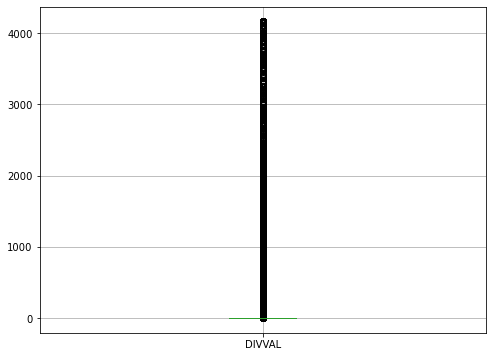

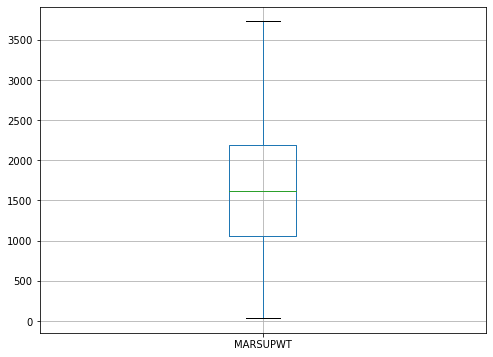

In [21]:
## Box Plots of 5 variables after clamping transformation
for name in ["AHRSPAY","CAPGAIN","CAPLOSS","DIVVAL","MARSUPWT"]:
    fig, ax = plt.subplots(1,1,figsize=(8,6))
    df_final.boxplot(column=name,ax=ax)

Note: We can observe that there is significant reduction in number of outliers for "CAPLOSS" & "MARSUPWT" variables 
after applying clamping. However, for other three variables outliers are still present. We can further reduce the upperbound(currently, it's two standard deviation from mean) of the clamping transformation for these variables. That would result in reducing the number of outlier. However, this upperbound value should be decided based on discussion with domain expert.

### Q3 - For all the interval and ratio scale features, create a scatter plot matrix (pairplots) and correlation matrix. For all ordinal scale features, create a correlation matrix using Spearman correlation. [35 pts]

Use the data scales list you created in Q1.

In [22]:
# your code goes here

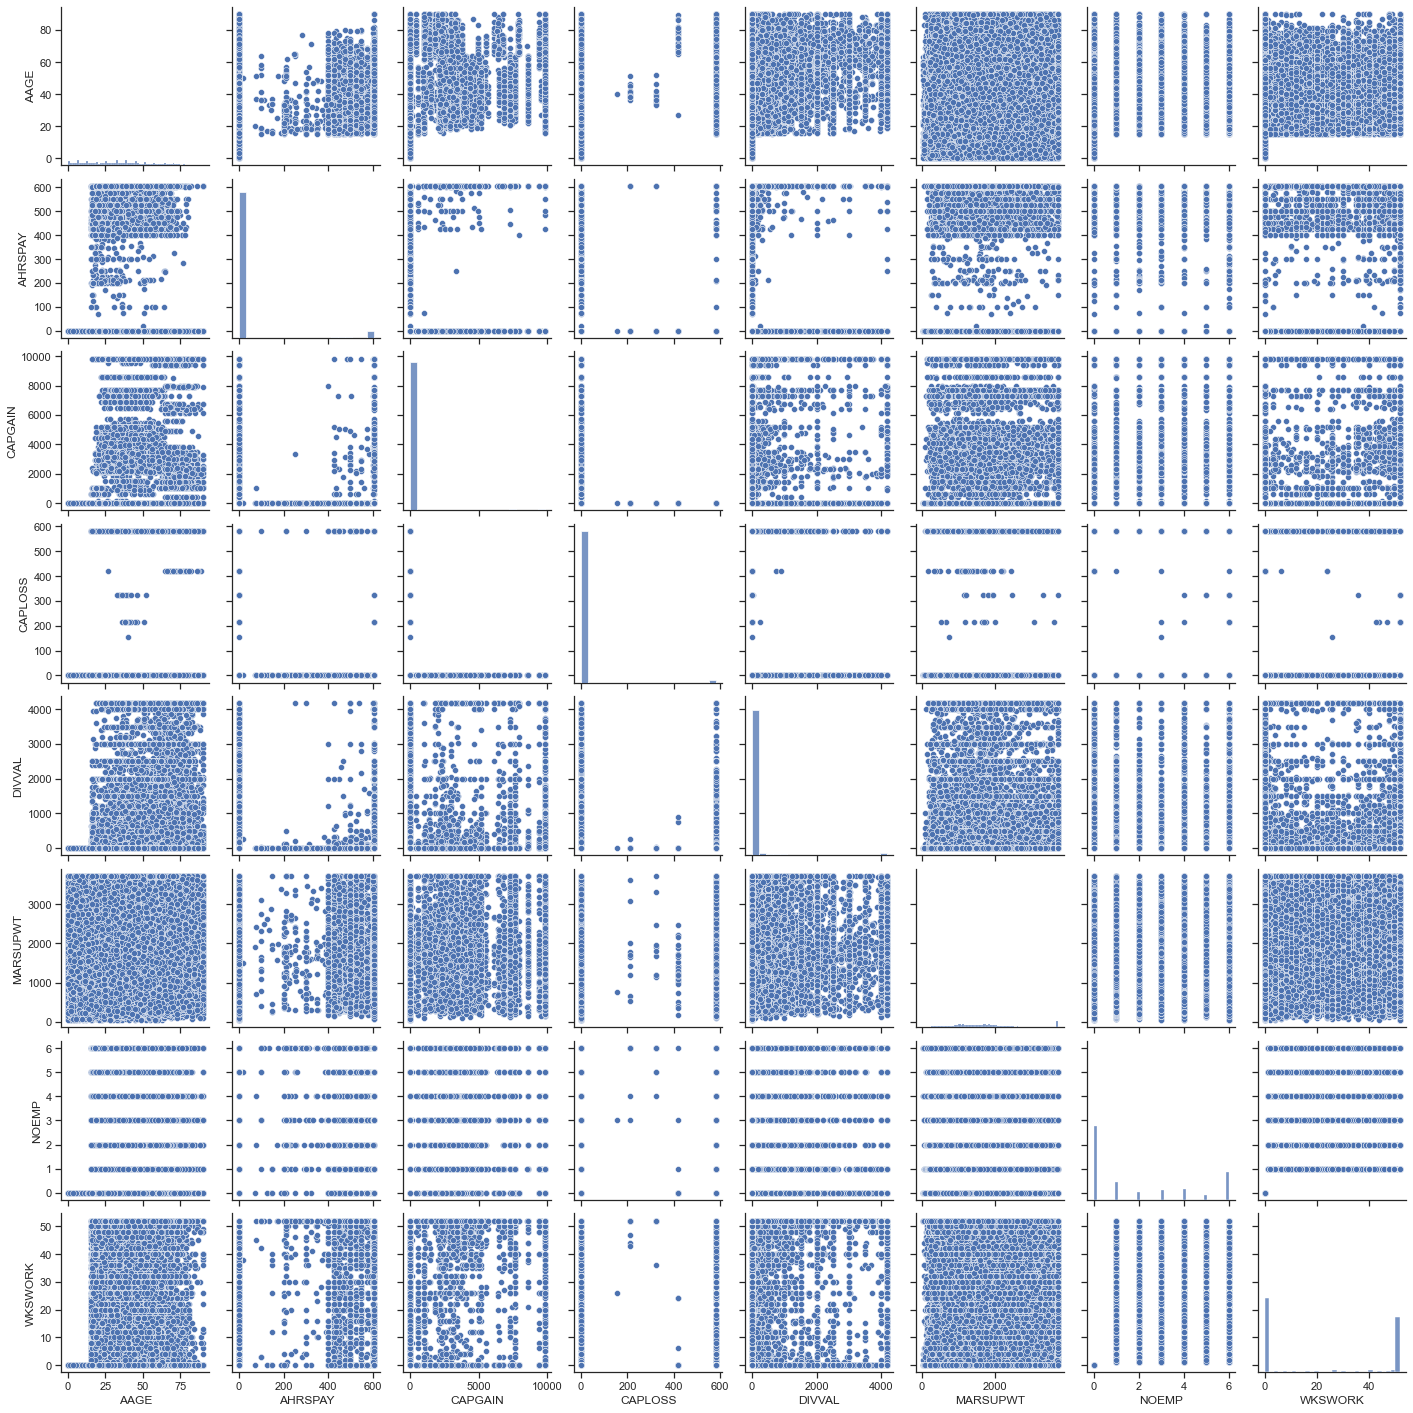

In [23]:
## Creating Scatter plots for all continous variables
sns.set_theme(style="ticks")
sns.pairplot(df_final[continous_vars],kind="scatter")


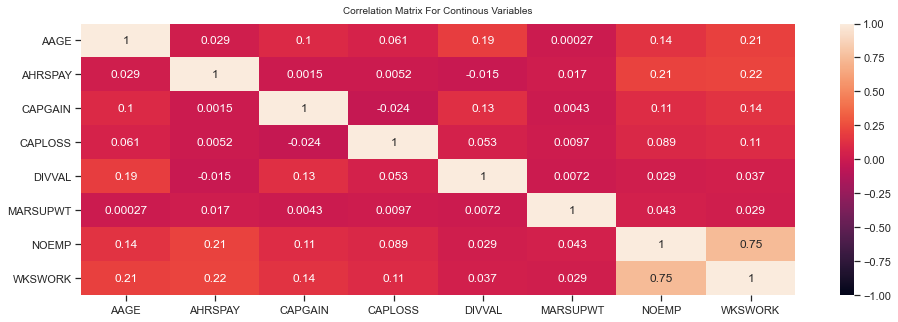

In [24]:
## Pearson Correlation matrix for all the continous values
plt.figure(figsize=(16, 5))
heatmap = sns.heatmap(df_final[continous_vars].corr(method="pearson"), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Matrix For Continous Variables', fontdict={'fontsize':10}, pad=10);

In [25]:
## Extracting list of all ordinal & ratio variables.
ordered_vars=variable_df[(variable_df["Data_Scale"]=="ordinal")|(variable_df["Data_class"]=="continious")]["Column_name"].to_list()

ordered_vars.remove("AHSCOL") ## This Feature was removed while handling missing values
ordered_vars

['AAGE',
 'AHGA',
 'AHRSPAY',
 'CAPGAIN',
 'CAPLOSS',
 'DIVVAL',
 'MARSUPWT',
 'NOEMP',
 'WKSWORK',
 'YEAR',
 'PTOTVALB']

In [26]:
## Ranking the categorical ordinal variable("AHGA") in the order given in the list below using ordinal Encoder.
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[["Children","Less than 1st grade","1st 2nd 3rd or 4th grade",
                                                             "5th or 6th grade","7th and 8th grade","9th grade",
                                                             "10th grade","11th grade","12th grade no diploma",
                                                             "High school graduate","Some college but no degree",
                                                             "Associates degree-occup /vocational","Associates degree-academic program",
                                                             "Bachelors degree(BA AB BS)","Masters degree(MA MS MEng MEd MSW MBA)",
                                                             "Prof school degree (MD DDS DVM LLB JD)","Doctorate degree(PhD EdD)"]])  ##(0,1,2,....)
df_final["AHGA"] = encoder.fit_transform(df_final[["AHGA"]])


In [27]:
## Ranking the categorical ordial variable("PTOTVALB") 
encoder_1 = OrdinalEncoder(categories=[["- 50000.","50000+."]])  ##(0,1)
df_final["PTOTVALB"] = encoder_1.fit_transform(df_final[["PTOTVALB"]])


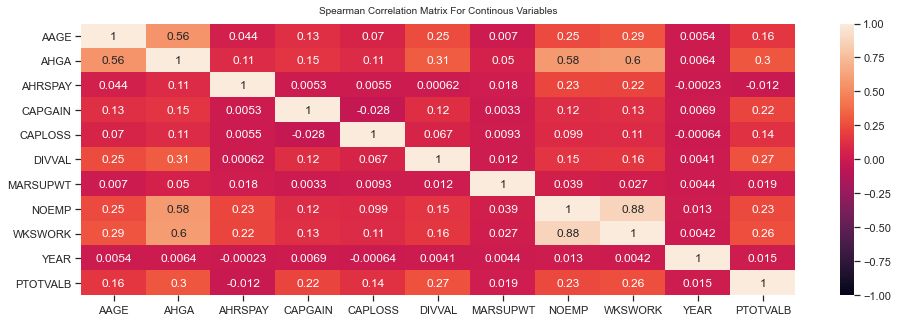

In [28]:
## Spearman correlation matrix for 
plt.figure(figsize=(16, 5))
heatmap = sns.heatmap(df_final[ordered_vars].corr(method="spearman"), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Spearman Correlation Matrix For Continous Variables', fontdict={'fontsize':10}, pad=10);
